# Redes Neuronales Clasificación Múltiple

Se usará una base de datos de prendas de vestir para un problema de clasificación, todas las prendas de verstir están clasificadas en 10 clases o tipos de ropa y consta de imágenes de 28x28 pixeles en escala de grises.

Esta base de datos es comunmente utilizada para poder hacer pruebas y aprender de redes neuronales.

60,000 impagenes para training y 10,000 para test.

Es utilizada en varios frameworks de machine learning.

Dos de los frameworks que pueden utilizar esta base de datos es tensorflow y keras.

Aquí la usaremos con Keras

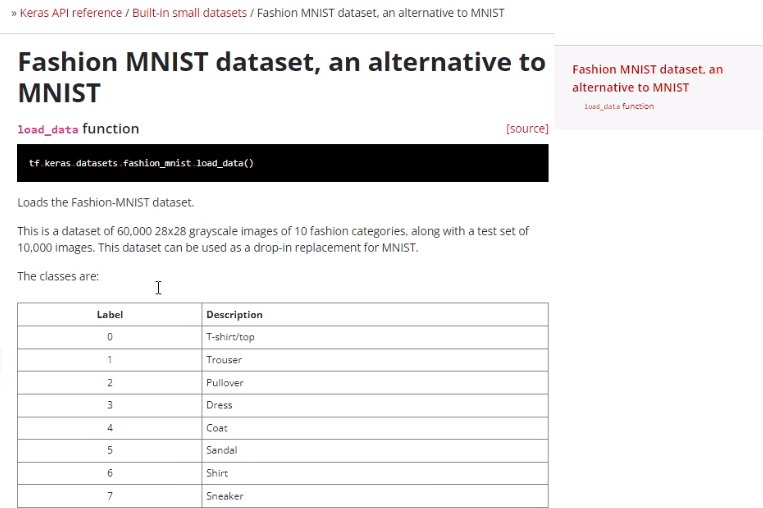

Podemos encontrar la documentación de Keras para utilizar éste dataset en la siguiente liga:

https://keras.io/api/datasets/fashion_mnist/

In [1]:
import tensorflow as tf 

In [2]:
print(tf.__version__)

2.11.0


In [3]:
# cargamos los datos como nos dice la documentación y verificamos que se obtuvieron de manera correcta con algunos test de dimesiones de los arreglos

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 1s 0us/step


Se necesita también de un arreglo para los labels:

Label	Description
- 0	    T-shirt/top
- 1	    Trouser
- 2	    Pullover
- 3	    Dress
- 4	    Coat
- 5	    Sandal
- 6	    Shirt
- 7	    Sneaker
- 8	    Bag
- 9	    Ankle boot

In [4]:
class_name = ['Polo', 'Pantalon', 'Pull-over', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Zapatillas', 'Bolso', 'Botines']


In [15]:
print(y_train[1]) # Label 0
print('\n')
print(x_train[0]) # Valor, se trata de un array de arrays, 28 arrays con 28 elementos cada uno, ya que cada elemento es el valor de un pixel
# Las imágnes se tratan de una sola matriz cada una y no tres, ya que se está trabajando en escala de grises y no RGB
# Van de 0 a 255 (blanco a negro)


0


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 23

In [16]:
import matplotlib.pyplot as plt 
import random 

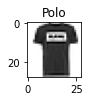

In [22]:
plt.figure(figsize=(1,1)) # Cambiando la figura al tamaño mínimo ya que la imagen a mostrar es pequeña y para que no se vea tan pixelada
plt.imshow(x_train[1], cmap=plt.cm.binary) # Se cambió a una escala de grises cmap binaria
plt.title(class_name[y_train[1]]) # Como se había comentado, en el index 1 se encuentra el primer label 
#plt.axis(False) Para ver las dimensiones de la imagen 28x28
plt.show()

La idea es crear una inteligencia artificial que tenga el mismo conocimiento que nosotros sobre, por ejemplo, un polo, y de esa forma pueda detectar cualquier polo y clasificarlo como un polo

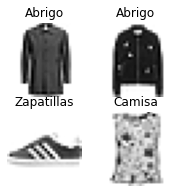

In [29]:
plt.figure(figsize=(3, 3))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1) # En dos filar y dos columnas mostrar cada una de las 4 imágenes
    index = random.choice(range(len(x_train))) # Cualquier imagen random de mis datos de entrenamiento
    plt.imshow(x_train[index], cmap=plt.cm.binary) # Se cambió a una escala de grises cmap binaria
    plt.title(class_name[y_train[index]]) # Como se había comentado, en el index 1 se encuentra el primer label 
    plt.axis(False)
plt.show()
    

Un experimento interesante se realizó con ésta base de datos, en el que se utilizaron diferentes aproximaciónes de deep learning para clasificar las prendas, y resultó que casi cualquiera de éstas aproximaciónes de machine learning tenía una precisión mejor que cuando dejaron a un grupo de personas clasificar las prendas viendo las imágenes del dataset.

Una inteligencia artificial tiene la capacidad de realizar mejor las tareas que cualquier persona que no sea un experto.

## Preprocesamiento


In [31]:
# Pasaremos la escala a 0 y 1 ya que sabemos que los colores de los pixeles en una imagen tienen valores entre 0 y 255

X_train = x_train / 255.0
X_test = x_test / 255.0


In [32]:
# Ahora se hará uso de la data de validación para que después de cada época que obtiene esos datos en base a los datos de entrenamiento, va
# a validar los datos en base a esos datos de validación, y de lo obtenido se hará un forward, va a regresar ese resultado a todas las neuronas
# para que tengan ese input y puedan hacer nuevos cálculos, es decir, en base a ese error de la validación recalcular los pesos y volver a
# entrenar el modelo con los datos de prueba

# Vamos a utilizar el X_train para obtener los datos de entrenamiento y validación, dado que ya tenemos los de prueba

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.16,
                                                  stratify=y_train,
                                                  random_state=0) # Stratify para dividir la porción de datos en la misma proporción de etiquetas
                                                                  #  que tiene el ejemplo

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)





(50400, 28, 28) (9600, 28, 28) (50400,) (9600,)
